# Question 1 (Understanding ElasticNet)
Although lots of past studies have been conducted on factors affecting life expectancy using demographic variables, income composition and mortality rates, it was found that the effect of immunization and human development index was not taken into account. Hence, this motivates us to resolve this factor by formulating a regression model based on mixed effects model and multiple linear regression while considering data from 2014 for all countries. Here, important immunization like Hepatitis B, Polio and Diphtheria will also be considered. 

This dataset was taken from https://www.kaggle.com/kumarajarshi/life-expectancy-who.

**Please use Python 3.6+ for this assignment.**

First, we import packages and clean up the obtained dataset. We consider the `Life Expectancy` variable as the dependant variable whereas others are assumed to be independent variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("life.csv", index_col=0)
print(df.shape)
df = df.loc[df['Year']==2014, :]
df = df.drop('Year', axis=1)
df = pd.get_dummies(df, columns=['Status'])
df = df.dropna()
print(df.shape)

(2938, 21)
(131, 21)


In [3]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
Albania,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,...,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,0,1
Algeria,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,...,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,0,1
Angola,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,...,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,0,1
Argentina,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,9,92.0,...,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3,0,1


In [4]:
# Creating training and testing dataset
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [5]:
X

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
Albania,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,0,1
Algeria,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,0,1
Angola,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,0,1
Argentina,118.0,8,7.93,847.371746,94.0,1,62.2,9,92.0,4.79,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,117.0,0,6.03,463.639782,95.0,0,63.4,0,95.0,8.58,95.0,0.1,16737.898270,3419546.0,1.5,1.4,0.791,15.5,0,1
Uzbekistan,184.0,16,0.01,0.442802,99.0,8,43.9,18,99.0,5.84,99.0,0.1,25.448414,37577.0,3.0,3.1,0.690,12.1,0,1
Vanuatu,134.0,0,0.01,564.816704,64.0,10,52.5,0,65.0,5.20,64.0,0.1,3148.365130,25885.0,1.5,1.4,0.596,10.8,0,1


## Question 1.1 
Run Linear regression on the train dataset and print the $R^2$ values measured on (a) the training dataset and (b) the test dataset.

## Answer 1.1

In [6]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('\nTrain R2:',str(r2_train))
print('Test R2:',str(r2_test))


Train R2: 0.8869822224758938
Test R2: 0.8355055233744485


## Question 1.2 
Run linear regression using Lasso and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model. Finally, store the best model separately. Also, use the co-efficients obtained and select the [columns with non-zero weights](https://stackoverflow.com/questions/62323713/selecting-columns-of-dataframe-where-lasso-coefficient-is-nonzero) and use them to create `X_train_lasso` and `X_test_lasso`. Show how many non-zero columns are present.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.2

In [7]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)
scaler.fit(X_test)
X_test_scale=scaler.transform(X_test)

lasso=Lasso(normalize=True,random_state=42)
alphas=10**np.linspace(1,-2,100)*0.5
scoresl_2=[]
for i in alphas:
    lasso.set_params(alpha=i)
    lassol_2=lasso.fit(X_train_scale,y_train)
    l_pred=lassol_2.predict(X_test_scale)
    l_predR2=r2_score(y_test,l_pred)
    scoresl_2.append([l_predR2])

a_index=scoresl_2.index(max(scoresl_2))
print('The best lambda value is', alphas[a_index])
print('With lambda', alphas[a_index],'the R^2 is',str(max(scoresl_2))[1:-1])


The best lambda value is 0.046630167344161
With lambda 0.046630167344161 the R^2 is 0.7326606923177986


In [8]:
lasso.set_params(alpha=alphas[a_index])
best_lasso=lasso.fit(X_train_scale,y_train)
best_lasso.coef_

array([-1.90683036e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  4.90604986e-01,  0.00000000e+00, -1.22901134e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        5.12315725e+00,  0.00000000e+00,  5.12495435e-02, -8.70930595e-17])

In [9]:
X_train_lasso=X_train.iloc[:,best_lasso.coef_!=0]
X_test_lasso=X_test.iloc[:,best_lasso.coef_!=0]
X_train_lasso

,Adult Mortality,Total expenditure,HIV/AIDS,Income composition of resources,Status_Developed,Status_Developing
Country,,,,,,
Mauritius,148.0,4.81,0.1,0.769,0,1
Greece,73.0,8.80,0.1,0.862,0,1
Afghanistan,271.0,8.18,0.1,0.476,0,1
Belize,177.0,5.79,0.2,0.705,0,1
France,79.0,11.54,0.1,0.890,0,1
...,...,...,...,...,...,...
Madagascar,225.0,3.40,0.3,0.509,0,1
Seychelles,17.0,3.37,0.1,0.766,0,1
Bhutan,216.0,3.57,0.5,0.596,0,1


In [10]:
print('There are',len(X_train_lasso.T),'non-zero columns')

There are 6 non-zero columns


## Question 1.3 
Run linear regression using Ridge and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Ridge model.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.3

In [11]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)
scaler.fit(X_test)
X_test_scale=scaler.transform(X_test)

ridge=Ridge(normalize=True,random_state=42)
alphas=10**np.linspace(1,-2,100)*0.5
scoresr_2=[]
for i in alphas:
    ridge.set_params(alpha=i)
    ridge_2=ridge.fit(X_train_scale,y_train)
    r_pred=ridge_2.predict(X_test_scale)
    r_predR2=r2_score(y_test,r_pred)
    scoresr_2.append([r_predR2])

i_index=scoresr_2.index(max(scoresr_2))
print('The best lambda value is', alphas[i_index])
print('With lambda', alphas[i_index],'the R^2 is',str(max(scoresr_2))[1:-1])

The best lambda value is 0.8148754173103222
With lambda 0.8148754173103222 the R^2 is 0.7066600746181261


In [12]:
ridge.set_params(alpha=alphas[i_index])
best_ridge=ridge.fit(X_train,y_train)
best_ridge.coef_

array([-1.45032046e-02, -1.02623660e-03,  1.46311726e-01,  9.00609956e-05,
        5.41305570e-03,  7.01240176e-06,  3.31018912e-02, -1.50350812e-03,
        1.22686233e-02,  1.36831116e-01,  1.17243850e-02, -7.69822023e-01,
        2.19013383e-05,  2.17062848e-09, -5.11918538e-02, -5.99576441e-02,
        1.10296950e+01,  4.23198838e-01,  1.05967055e+00, -1.05967055e+00])

## Question 1.4  
Run [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) [(Video Reference)](https://youtu.be/1dKRdX9bfIo) on the `X_train_lasso` dataset by using all possible values from the below mentioned parameter set:

    l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements
    alphas = 10**np.linspace(1, -2, 100)*0.5 # 100 elements
    normalize = True
    random_state = 42


Store the $R^2$ score obtained from `X_test_lasso` set for each combination in an array with 101 rows and 100 columns. e.g.

    arr[i][j] = curr_r2_score # obtained using l1_ratios[i] and alphas[j]

where `i` is the `ith` element from `l1_ratio` and `j` is the `jth` element from `alphas`. Print the best $R^2$ score obtained using test set and its corresponding `alpha` and `l1 ratio`.

In [13]:
 arr = np.zeros((101, 100)) # Create 101x100 array

Note that by varying the `l1_ratio`, you are controlling the ratio of Lasso and Ridge regularization that is present in the model. When `l1_ratio = 1`, it means that the model uses Lasso regularization only whereas when `l1_ratio = 0`, it means that the model uses Ridge regularization only. You can find the formula for the loss function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).

## Answer 1.4

In [14]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
l1_ratio = list(np.arange(0, 1.01, 0.01))
alpha = list(10**np.linspace(1, -2, 100)*0.5)
enet = ElasticNet(random_state=42, normalize=True)
tuned_parameters = [{'l1_ratio': l1_ratio,'alpha': alpha}]
n_folds = 5
clf = GridSearchCV(enet, tuned_parameters, scoring='r2', cv=n_folds, refit=False)
clf.fit(X_train_lasso, y_train)
print(clf.best_params_)
print('R^2:', clf.best_score_)

{'alpha': 0.026683496156031536, 'l1_ratio': 1.0}
R^2: 0.8545819342002436


In [15]:
for i in l1_ratio:
    for j in alpha:
        enet = ElasticNet(normalize = True, alpha = j, l1_ratio = i, random_state = 42)
        enet.fit(X_test_scale, y_test)
        arr[l1_ratio.index(i)][alpha.index(j)] = r2_score(y_test.values, enet.predict(X_test_scale))
arr

array([[0.08556818, 0.09119059, 0.09714267, ..., 0.87481719, 0.8762796 ,
        0.87772829],
       [0.08176365, 0.08747191, 0.09351413, ..., 0.87499728, 0.87645892,
        0.87790717],
       [0.07787422, 0.08367071, 0.08980555, ..., 0.87517867, 0.87663957,
        0.87808746],
       ...,
       [0.        , 0.        , 0.        , ..., 0.92450329, 0.92569572,
        0.92687132],
       [0.        , 0.        , 0.        , ..., 0.92681684, 0.92783123,
        0.92886284],
       [0.        , 0.        , 0.        , ..., 0.92900425, 0.92984186,
        0.9306965 ]])

## Question 1.5 
Call `plot_heatmap()` using the 101x100 array from the previous question. What does this heatmap represent? Interpret the heatmap.

In [16]:
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

def format_y(value, tick_number):
    return f'{value/100.:0.2f}'

def format_x(value, tick_number):
    return f'{rescale(value, 0., 100., 0.05, 5.):0.2f}'

def plot_heatmap(arr):
    ax = sns.heatmap(arr)
    ax.set_ylabel("L1 Ratio")
    ax.set_xlabel("alpha")
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_y))

## Answer 1.5

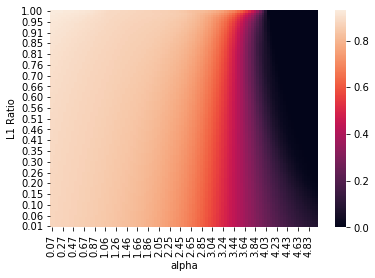

In [17]:
plot_heatmap(np.fliplr(arr))

The heatmap shows the $R^2$ of the ElasticNet model at varying levels of L1 Ratio and alpha values. The L1 Ratio represents the proportion of Lasso penalty to Ridge penalty. The largest the ratio, the more Lasso penalty is being applied and vice-versa. Alpha represents the value of the penalty coefficient that compresses the weights towards 0. The heatmap shows that there is a slight benefit to Lasso over Ridge, but more importantly the Alpha value has a much larger impact on model accuracy than the proportion of Lasso to Ridge. In addition, the ideal alpha value is very low, almost 0 which means the model is very similar to standard OLS linear regression. Regularization is not having a large impact in this model with the ElasticNet model yielding only a 2% improvement in Test $R^2$ over OLS.

# Question 2 
Suppose you learn a ridge regression based on some of the independent variables available to you, and including a few interaction terms as well. Your result is disappointing, and you believe that the model is suffering from either too much bias or too much variance. Describe briefly how you will test which alternative is more likely to be true. (there is no extra data that you can use, so “get more data” is not an option).

## Answer 2
Split data into train and test, check whether increasing the lambda/alpha value for the regularization improves the resulting regression's RMSE or MAE on the test set. If the RMSE improves (decreases) than the regression benefitted from additional regularization and the reduction of complexity. Increased regularization means larger bias but less variance so if the original ridge regression performed worse it was because of too much variance. If the new regression performs worse than there is too much bias and the regularization term should be decreased. 


# Question 3 Bias-Variance 

We want to build a model that can predict y for unknown inputs x.

(a) Fit a linear model to the training data, and report mean squared error on the test data. Plot the train and test points on the same plot, clearly denoting the training and testing points. On the same figure, plot the predictions of the linear model using x_all. All the plots must be in the same figure and be clearly labeled.


(b) Fit polynomial models of degrees 2, 3, 4 and 12 to the training data, Report mean squared error (on both train and test sets) for all the models. Plot the data (train and test points) as before.  On the same figure, plot the predictions of the polynomial models using x_all. All the plots must be in the same figure and be clearly labeled.


(c) Which model performed the best? Explain.


* Use the below code to load the data from the file 'ps01.data'. It is organized as a dictionary, of train and test data.

In [18]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

x_all = np.linspace(-2,5,101).reshape(-1,1)
all_files = np.load("q3_data.npz")
x_train, y_train, x_test, y_test = all_files['arr_0'], all_files['arr_1'], all_files['arr_2'], all_files['arr_3']

### Answer

#### (a)

MSE: 4.739110717634691


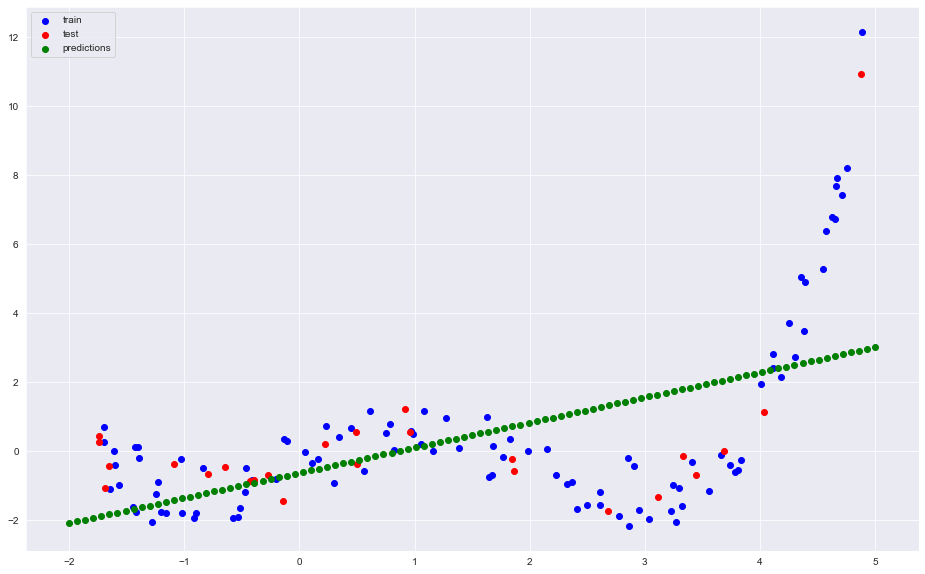

In [19]:
model = lm.LinearRegression()
model.fit(x_train, y_train)
lin_preds = model.predict(x_test)
print('MSE:',str(mean_squared_error(y_test,lin_preds)))

all_preds = model.predict(x_all)

plt.figure(figsize=(16,10))
plt.scatter(x_train, y_train, c='b')
plt.scatter(x_test, y_test, c='r')
plt.scatter(x_all, all_preds, c='g')
plt.legend(['train','test','predictions'])

### (b)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2)
poly_3 = PolynomialFeatures(degree=3)
poly_4 = PolynomialFeatures(degree=4)
poly_12 = PolynomialFeatures(degree=12)

x_2 = poly_2.fit_transform(x_train)
x_2_test = poly_2.fit_transform(x_test)
x_3 = poly_3.fit_transform(x_train)
x_3_test = poly_3.fit_transform(x_test)
x_4 = poly_4.fit_transform(x_train)
x_4_test = poly_4.fit_transform(x_test)
x_12 = poly_12.fit_transform(x_train)
x_12_test = poly_12.fit_transform(x_test)

model_2 = lm.LinearRegression()
model_3 = lm.LinearRegression()
model_4 = lm.LinearRegression()
model_12 = lm.LinearRegression()

model_2.fit(x_2, y_train)
model_3.fit(x_3, y_train)
model_4.fit(x_4, y_train)
model_12.fit(x_12, y_train)

preds_2_train = model_2.predict(x_2)
preds_2 = model_2.predict(x_2_test)
preds_3_train = model_3.predict(x_3)
preds_3 = model_3.predict(x_3_test)
preds_4_train = model_4.predict(x_4)
preds_4 = model_4.predict(x_4_test)
preds_12_train = model_12.predict(x_12)
preds_12 = model_12.predict(x_12_test)

print('Polynomial 2 train MSE:',str(mean_squared_error(y_train, preds_2_train)))
print('Polynomial 2 test MSE:',str(mean_squared_error(y_test, preds_2)))
print('Polynomial 3 train MSE:',str(mean_squared_error(y_train, preds_3_train)))
print('Polynomial 3 test MSE:',str(mean_squared_error(y_test, preds_3)))
print('Polynomial 4 train MSE:',str(mean_squared_error(y_train, preds_4_train)))
print('Polynomial 4 test MSE:',str(mean_squared_error(y_test, preds_4)))
print('Polynomial 12 train MSE:',str(mean_squared_error(y_train, preds_12_train)))
print('Polynomial 12 test MSE:',str(mean_squared_error(y_test, preds_12)))

Polynomial 2 train MSE: 3.241421853814466
Polynomial 2 test MSE: 3.118688012803552
Polynomial 3 train MSE: 1.4201223351315244
Polynomial 3 test MSE: 1.6698703639509378
Polynomial 4 train MSE: 0.3745950147780304
Polynomial 4 test MSE: 0.2793974390234908
Polynomial 12 train MSE: 0.32974847922651873
Polynomial 12 test MSE: 0.40228762196683066


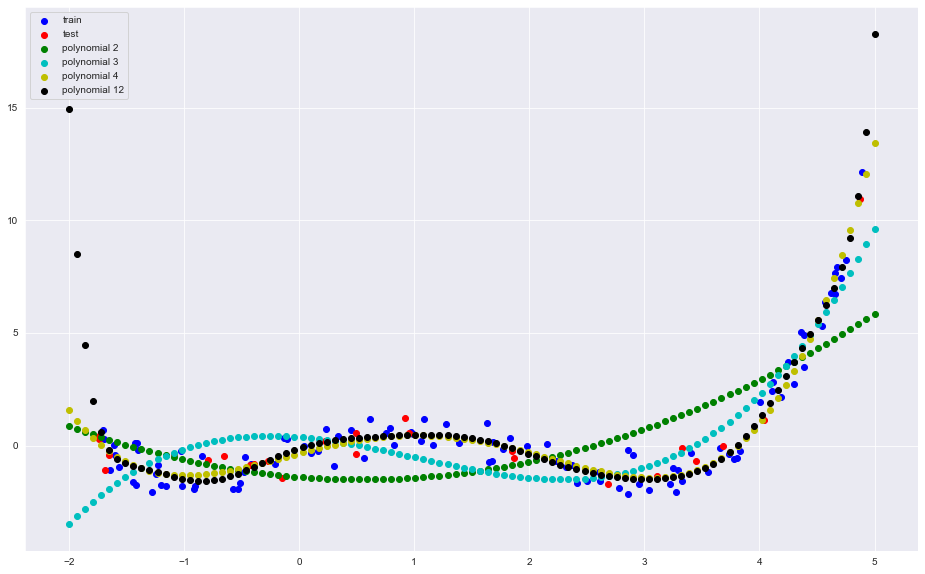

In [21]:
x_all_2 = poly_2.fit_transform(x_all)
x_all_3 = poly_3.fit_transform(x_all)
x_all_4 = poly_4.fit_transform(x_all)
x_all_12 = poly_12.fit_transform(x_all)

all_preds_2 = model_2.predict(x_all_2)
all_preds_3 = model_3.predict(x_all_3)
all_preds_4 = model_4.predict(x_all_4)
all_preds_12 = model_12.predict(x_all_12)

plt.figure(figsize=(16,10))
plt.scatter(x_train, y_train, c='b')
plt.scatter(x_test, y_test, c='r')
plt.scatter(x_all, all_preds_2, c='g')
plt.scatter(x_all, all_preds_3, c='c')
plt.scatter(x_all, all_preds_4, c='y')
plt.scatter(x_all, all_preds_12, c='k')
plt.legend(['train',
            'test',
            'polynomial 2',
            'polynomial 3',
            'polynomial 4',
            'polynomial 12'])

### (c)

The polynomial model of degree 4 performed the best because it had the lowest test MSE score at 0.279. While the polynomial model of degree 12 perfermed better on the training set, this is indicative of overfitting and the polynomial model of degree 4 generalizing better to new data.